<a href="https://colab.research.google.com/github/muhamad-kurniawan/deep_learning_course_CNU/blob/main/Exercise_2_Simple_Neural_Network_and_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Exercise 2-1

def activation_function(x):
  return np.where(x >= 0, 1, 0)

def func_neuron_1(a, b):
  return a+b-0.5

def func_neuron_2(a, b):
  return -a-b+1.5

def func_neuron_3(a, b):
  return a+b-1

# Create a grid of values
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
x1, x2 = np.meshgrid(x1, x2)

output = activation_function(func_neuron_3(activation_function(func_neuron_1(x1, x2)), activation_function(func_neuron_2(x1, x2))))

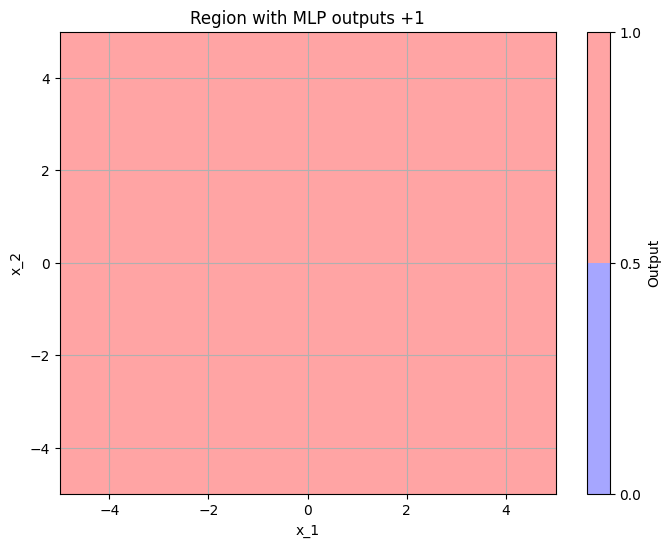

In [23]:
plt.figure(figsize=(8, 6))
plt.contourf(x1, x2, output, levels=[0, 0.5, 1], cmap='bwr', alpha=0.7)
plt.title('Region with MLP outputs +1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.colorbar(label='Output')
plt.grid(True)
plt.show()

In [24]:
#Exercise 2-2

#Two layer Neural Network

class two_layer_NN():
  def __init__(self, n_input=2, n_hidden=16, random_state=1, verbose=0):
    self.random_state = random_state
    self.n_input = n_input
    self.n_hidden = n_hidden
    self.verbose = verbose

    #random initial weights
    np.random.seed(random_state)
    self.u_weights = np.random.rand(n_hidden, n_input+1)
    self.v_weights = np.random.rand(n_hidden+1)

  def fit(self, X, y, epoch=100, learning_rate=0.4):
    self.learning_rate = learning_rate

    for e in range(epoch):
      for n_row in range(len(X)): #loop through rows of input
        self.process_input(X[n_row], y[n_row], backpropagate=True)

  def predict(self, X):
    predictions = []
    for n_row in range(len(X)): #loop through rows of input
      predictions.append(self.process_input(X[n_row]))
    return predictions

  def process_input(self, X, y=None, backpropagate=False):
    #forward pass
    x_input = np.append(X, 1) #add bias to input layer
    z1 = (x_input*self.u_weights).sum(axis=1)
    a1 = np.array(list(map(self.sigmoid, z1)))
    a1 = np.append(a1, 1) #add bias to hidden layer output
    z2 = sum(a1*self.v_weights)
    a2 = self.sigmoid(z2)

    if backpropagate==False:
      return a2
    else:
      #backpropagation
      d_2 = self.cost_func(y, a2, derivative=True)*(a2*(1-a2)) #calculate error term d in output layer
      v_weights_updated = self.v_weights-(self.learning_rate*d_2*a1) #calculate weights in output layer

      d_1 = self.v_weights*d_2*(a1*(np.ones(len(a1))-a1)) #calculate error term d in hidden layer
      u_weights_updated = self.u_weights-(self.learning_rate*d_1[:-1]*np.tile(x_input,(len(d_1[:-1]),1)).T).T #calculate weights in hidden layer

      #update weight
      self.u_weights = u_weights_updated
      self.v_weights = v_weights_updated

  def sigmoid(self, value):
    return 1.0 / (1.0 + np.exp(-value))

  def cost_func(self, target, pred, derivative=False):
    if derivative==False:
      return 0.5*((target-pred)**2)
    else:
      return pred-target

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

def generate_sample(N):
  x_1 = np.random.uniform(-2, 2, N)
  x_2 = np.random.uniform(-4, 4, N)

  x1x2 = np.dstack((x_1, x_2))
  mu = np.array([0, 0])  # Mean
  C = np.array([[0.3, -0.5], [-0.5, 2]])  # Covariance matrix

  y = multivariate_normal.pdf(x1x2, mean=mu, cov=C)
  return x_1, x_2, y

# generate 200 training sample
x_1_train, x_2_train, y_train = generate_sample(200)

# generate 100 test samples
x_1_test, x_2_test, y_test = generate_sample(100)
y_test = y_test.reshape(x_1_test.shape)



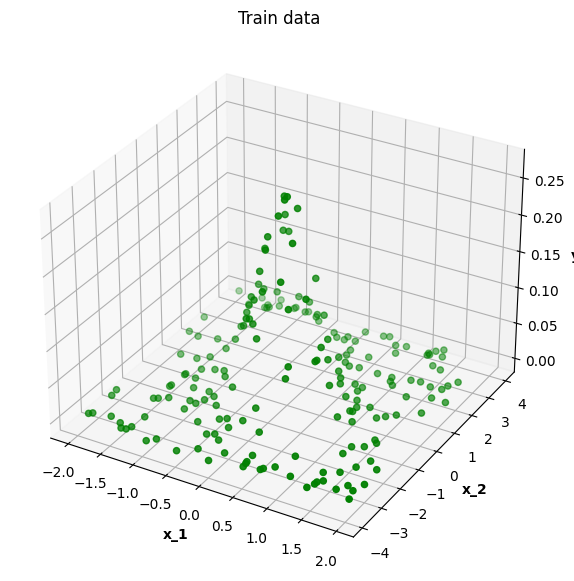

In [26]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_1_train, x_2_train, y_train, color = "green")
plt.title("Train data")

ax.set_xlabel('x_1', fontweight ='bold')
ax.set_ylabel('x_2', fontweight ='bold')
ax.set_zlabel('y', fontweight ='bold')

plt.show()

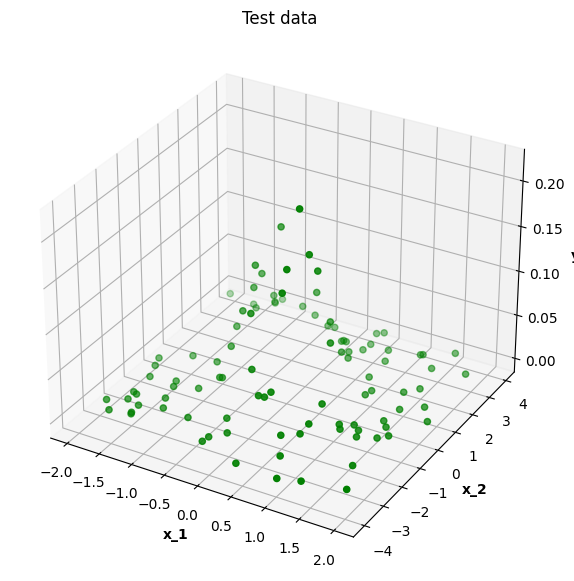

In [27]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_1_test, x_2_test, y_test, color = "green")
plt.title("Test data")

ax.set_xlabel('x_1', fontweight ='bold')
ax.set_ylabel('x_2', fontweight ='bold')
ax.set_zlabel('y', fontweight ='bold')

plt.show()

In [28]:
#combine x_1 and x_2 for train and test
X_train = np.array([x_1_train, x_2_train]).T
X_test = np.array([x_1_test, x_2_test]).T

In [34]:
import time
startTime = time.time()
epoch=10

mae_train_list = []
mae_test_list = []
epoch_list = []

while epoch<=1500:
  reg = two_layer_NN(n_hidden=10)
  reg.fit(X_train,y_train, epoch=epoch, learning_rate=0.7)

  pred_train = reg.predict(X_train)
  pred_test = reg.predict(X_test)
  mae_train_list.append(sum(abs(y_train-pred_train))/len(y_train))
  mae_test_list.append(sum(abs(y_test-pred_test))/len(y_test))

  epoch_list.append(epoch)
  epoch+=100

endTime = time.time() - startTime
print(endTime)

299.38885712623596


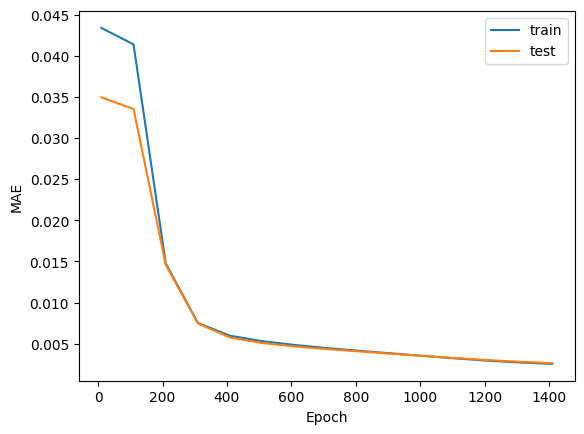

In [35]:
#Plot number of epoch vs error (MAE)

plt.plot(epoch_list, mae_train_list, label='train' )
plt.plot(epoch_list, mae_test_list, label='test')
plt.legend()
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.show()

In [38]:
num_train_sample = 100
mae_train_list = []
mae_test_list = []
num_train_sample_list = []

while num_train_sample<=2000:
  x_1_train, x_2_train, y_train = generate_sample(num_train_sample)

  #combine x_1 and x_2
  X_train = np.array([x_1_train, x_2_train]).T

  reg = two_layer_NN(n_hidden=10)
  reg.fit(X_train,y_train, epoch=500, learning_rate=0.7)

  pred_train = reg.predict(X_train)
  pred_test = reg.predict(X_test)
  mae_train_list.append(sum(abs(y_train-pred_train))/len(y_train))
  mae_test_list.append(sum(abs(y_test-pred_test))/len(y_test))

  num_train_sample_list.append(num_train_sample)
  num_train_sample+=100

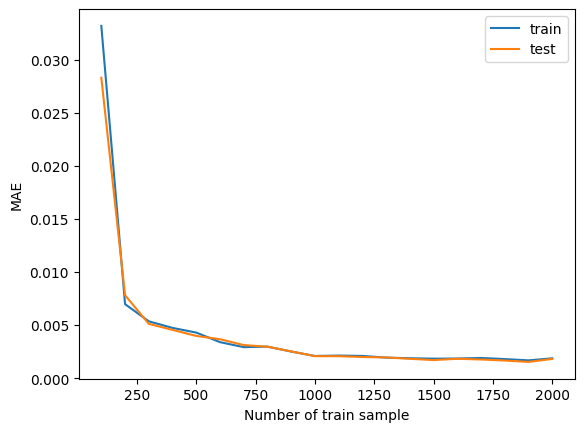

In [39]:
plt.plot(num_train_sample_list, mae_train_list, label='train' )
plt.plot(num_train_sample_list, mae_test_list, label='test')
plt.legend()
plt.ylabel("MAE")
plt.xlabel("Number of train sample")
plt.show()

In [41]:
num_hidden = 1
mae_train_list = []
mae_test_list = []
num_hidden_list = []

x_1_train, x_2_train, y_train = generate_sample(1000)

#combine x_1 and x_2
X_train = np.array([x_1_train, x_2_train]).T

while num_hidden<=15:

  reg = two_layer_NN(n_hidden=num_hidden)
  reg.fit(X_train,y_train, epoch=500, learning_rate=0.7)

  pred_train = reg.predict(X_train)
  pred_test = reg.predict(X_test)
  mae_train_list.append(sum(abs(y_train-pred_train))/len(y_train))
  mae_test_list.append(sum(abs(y_test-pred_test))/len(y_test))

  num_hidden_list.append(num_hidden)
  num_hidden+=1

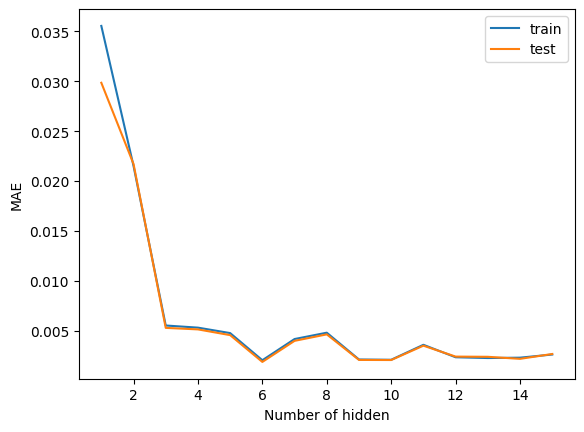

In [42]:
plt.plot(num_hidden_list, mae_train_list, label='train' )
plt.plot(num_hidden_list, mae_test_list, label='test')
plt.legend()
plt.xlabel("Number of hidden")
plt.ylabel("MAE")
plt.show()